## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)




<a id='descriptive'></a>
## Part I - Descriptive Statistics


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

`1.a)` Read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0
5,UK,treatment,0
6,US,treatment,0
7,US,treatment,0
8,US,treatment,0
9,US,treatment,0


`b)` Find the number of rows in the dataset.

In [3]:
# Using the shape() function to see the lenght of the df dataset.
# 69889 rows in the dataset. 
df.shape[0]

69889

`c)` The proportion of users converted. 

In [3]:
# Using the mean() function to get the mean of '1' value in the converted column that represents for the proportion
# of the users converted ~ 13%

df.converted.mean()

0.13047832992316388

`d)` Do any of the rows have missing values? 

In [3]:
# Using isnull() function to check if any null value in the column and sum() will sum all the null row containing 
# null value in the df. (no missing value in the dataset)
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country?

In [7]:
# Usint the groupby() function to count the total customers from each country.
# Canada: 3488 users
# United Kingdom: 17551 users
# United States: 48850 users

df.groupby('country').count()

,group,converted
country,,
CA,3488,3488
UK,17551,17551
US,48850,48850


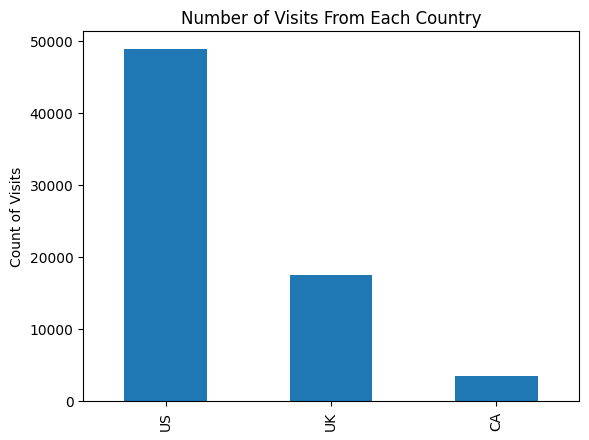

In [3]:
# Using Matplotlib() to illustrate the amount of difference of customers in each country
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

In [8]:
# The result shows that the values in the country column and group column can be a categorical data type.
# The converted column should be a integer type because the values in the column will help to indicated the insight
# from the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Answer:** \
The only two values in the **'converted'** column are: **0** and **1**.
- Value: **"0"** can be represented as **non-satisfaction**.
- Value: **"1"** can be represented as **satisfaction**. 

> **Yes**, They are the only two values that make sense for the A/B Testing experiment because the result will be indicated based on the comparison between user satisfaction. 

In [9]:
#Using the astype() function to change the type for the country and group column.
df['country'] = df['country'].astype('category')
df['group'] = df['group'].astype('category')

In [10]:
#Check again to ensure the result data type for each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    69889 non-null  category
 1   group      69889 non-null  category
 2   converted  69889 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 682.9 KB


----

<a id='probability'></a>
## Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [11]:
# The mean() function helps to get the proportion of '1' in (converted column) of entire df.
# There is a ~ 13% probability that the entire user will converted.

df['converted'].mean()

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [12]:
# The below code will extract the proportion of '1' in (converted column) only in the countrol group. 
# There is a ~ 10.5% probability that the user in the control group are satisfied with the current version. 

control_prob = df.query('group == "control"')['converted'].mean()
control_prob

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [13]:
# The below code will extract the proportion of '1' in (converted column) only in the treatment group.
# There is a ~ 15.5% probability that the user in the treatment group are satisfied with the new version. 

treatment_prob = df.query("group == 'treatment'")['converted'].mean()
treatment_prob

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [14]:
#The converted probability in the treatment group is higher than the control group in ~ 5%

treatment_prob - control_prob

0.050066728877864425

`e)` What is the probability that an individual was in the `treatment`?

In [28]:
# Calculating the percentage of users in the treatment group and the total amount of users will generate the probability 
# of an individual will belong to the treatment group. (~ 50.4%) 

(df.query("group == 'treatment'").count())/len(df)

country      0.503813
group        0.503813
converted    0.503813
intercept    0.503813
ab_page      0.503813
CA           0.503813
US           0.503813
UK           0.503813
dtype: float64

In [16]:
# Calculating the percentage of users in the control group and the total amount of users will generate the probability 
# of an individual will belong to the control group. (~ 49.6%) 

(df.query("group == 'control'").count())/len(df)

country      0.496187
group        0.496187
converted    0.496187
dtype: float64

`f)` What is the probability that an individual was from Canada `CA`?

In [17]:
# Calculating the percentage of users in the Canada country and the total amount of users will generate the probability 
# of an individual will belong to Canada. (~ 5%) 

df.query("country == 'CA'").count()/len(df)

country      0.049908
group        0.049908
converted    0.049908
dtype: float64

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [18]:
# The code below will generate the amount of converted regarless of the group.
# The probability of a converted user in the US is ~13.2%

us_converted = df.query('country == "US"')['converted'].mean()
us_converted

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [19]:
# The code below will generate the amount of converted regarless of the group.
# The probability of a converted user in the US is ~12.5%

uk_converted = df.query('country == "UK"')['converted'].mean()
uk_converted

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [20]:
# The probability of the user converted in the US is higher than the UK by ~ 0.7%

us_converted - uk_converted

0.007652721616611152

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [10]:
# Using the query() function to take only the value of control and treatment group the US.
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [11]:
# Using the query() function to take only the value of control and treatment group the United Kingdom.
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [12]:
# Using the query() function to take only the value of control and treatment group the Canada.
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

##### Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.1%          |  9.4%          |
| Treatment   | 15.8%       |  14.8%          |  15.4%          |

----

<a id='experimentation'></a>
## Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [4]:
#The converted rate (in the null hypothesis)
p_control_treatment_null  = df['converted'].mean()

# The amount of users in the treatment group.
n_treatment = df.query('group == "treatment"').shape[0]

# The amount of users in the control group.
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [5]:
# Under the null hypothesis the probability of treatment group and the control group are equal. 
# Assigning the p_treatment_null as the same value as the p_control_treatment_null.

p_treatment_null = p_control_treatment_null

In [6]:
# Using the numpy random binomial function to get a random '0 or 1' with 
# the p_treatment_null probability and n_treatment time, then store the value in the treatment_converted array. 

treatment_converted = np.random.binomial(1, p_treatment_null, n_treatment).tolist()

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [7]:
# Under the null hypothesis the probability of treatment group and the control group are equal. 
# Assigning the p_control_null as the same value as the p_control_treatment_null.

p_control_null = p_control_treatment_null

In [8]:
# Using the numpy random binomial function to get a random '0 or 1' with 
# the p_control_null probability and n_control time, then store the value in the control_converted array.
control_converted = np.random.binomial(1, p_control_null, n_control).tolist()

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [9]:
# The code below will show the difference between the average amount converted users in the treatment group with
# the average converted users in the control group. 
# which is almost ~ 0.01% in different. 

diff = (sum(treatment_converted)/len(treatment_converted)) - (sum(control_converted)/len(control_converted))
diff

-0.005148996477087442

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [10]:
p_diffs = []

# Run 500 sampling
for i in range(500):
     # simulate the treatment and control converted arrays
    treatment_converted = np.random.binomial(1, p_treatment_null, n_treatment).tolist()
    control_converted = np.random.binomial(1, p_control_null, n_control).tolist()
    
    # calculate the average rate of converted in the treatment and control group under the null hypothesis.
    p_treatment = sum(treatment_converted)/len(treatment_converted)
    p_control = sum(control_converted)/len(treatment_converted)
    
    # calculate the difference between p_treatment_null and p_control_null
    diff = p_treatment - p_control
    
    # add p_diff to the p_diffs array
    p_diffs.append(diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<AxesSubplot: >

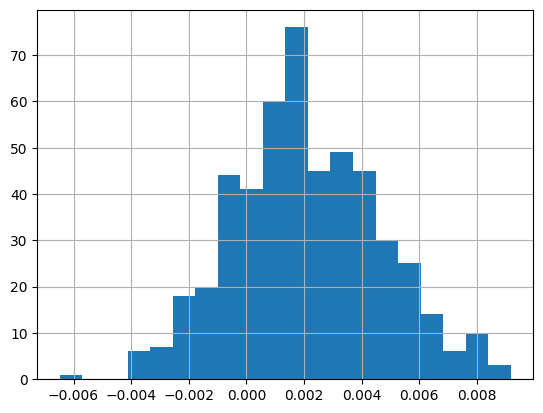

In [11]:
# Using the panda chart to illustrate the difference in treatment and control group 
# --> The result histogram chart shows the normal distribution of 500 simulations under the null hypothesis, 
# shows a slight difference in rate between the two groups but is insignificant. 

p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [12]:
# Assigning the p_control_df as the actual (observed) probability of the converted in the control group in the dataset. 
p_control_df = df.query("group == 'control'")['converted'].mean()
p_control_df

0.1052540515600669

In [13]:
# Assigning the p_control_df as the actual (observed) probability of the converted in the treatment group in the dataset. 
p_treatment_df = df.query("group == 'treatment'")['converted'].mean()
p_treatment_df

0.15532078043793132

In [14]:
# Assigning the observed_diff to indicate the difference between the actual statistic of the p_treatment_df and p_control_df
observed_diff = p_treatment_df - p_control_df
observed_diff

0.050066728877864425

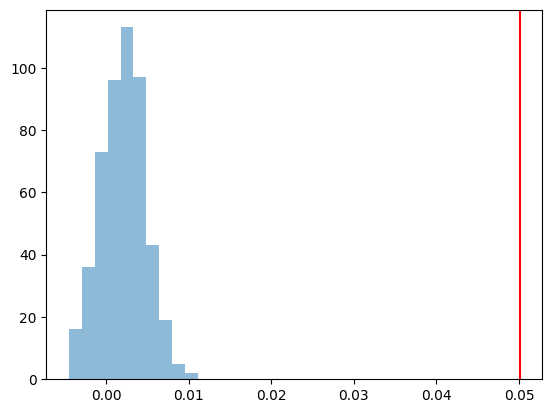

In [26]:
# The chart shows the normal distribution under the null hypothesis and 
# the red line represents the observed difference value from the dataset.

plt.hist(p_diffs, alpha = 0.5, label = "The different");
plt.axvline(observed_diff, color= 'r');

In [15]:
# Getting the p_value based on the null hypothesis and observed statistic. 
p_value = (p_diffs > observed_diff).mean()
p_value

0.0

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**Answer:** 
- **Null Hypothesis**: The null hypothesis is the initial hypothesis of the experiment, assuming the new version of the website will not increase the user's satisfaction and tend to keep the old version.
- **Alternative Hypothesis**: The alternative hypothesis assumes the new website version will increase the user's experiences. This hypothesis is indicated by the number of users satisfied with the new website exceed the number of users from the old website.
- **Treatment group**: The group of users testing the experience on the new version website.
- **Control group**: The group of users testing the experience on the new current version website.\
\
"The histogram chart in (g) part shows the simulated normal distribution of proportion differences between the treatment and control groups under the null hypothesis. The distribution is based on **(500 simulations)"**. \
\
Two key observations from the experiment:

**1. Observed Difference**: The red line represents the actual observed difference in proportions from the original dataset, lies outside the range of values expected under the null hypothesis (indicated by the shaded area).
\
**2. p-value**: The calculated p-value as 0.0 is significantly smaller than the **significance level alpha 0.05**. Meaning the chance of observing a difference under the null hypothesis is almost 0%. 

Based on the **observed difference** and the **p_value** on 500 sampling simulations, the null hypothesis is rejected and concludes that there is a statistically significant difference in proportions between the treatment and control groups. 
> The **statistical significance** result from this experiment indicates that the new webpage is likely to increase customer satisfaction compared to the current version, so the company should implement the new website. But before making the final decision, more factors, known as the practical significance, should be considered.  

<a id='algorithms'></a>
## Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Answer: **Logit Regression**

In [16]:
# Using the get_dummies() function to seperate the column group and assign the new column name "ab_page" represents
# for the treatment group as value "1". 

df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [17]:
# Assigning X as the explanatory variable for the intercept and groups.
# Assigning y as the response variable. 

X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [18]:
# imporing statsmodels and pass the value y and Y to the Logit regression model. 

import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [19]:
# Print the summary for the Regression model with y and X values. 
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                0.007175
Time:                        00:53:38   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**Answer:**
**Yes**. It has the same conclusion as the experiment above. 
> The **p_value** of the ab_page is 0.0, which is smaller than the statistical significance level of 0.05, which is strong evidence that the ab_page has a statistical significance to the conversion rate and against the null hypothesis. 

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [20]:
# Using the get_dummies() function to seperate the column country to three columns: (CA, US, and UK)

df[['CA','US','UK']] = pd.get_dummies(df['country'])

In [21]:
# Create the intercept column with value 1
df['intercept'] = 1

In [22]:
# Using the drop() function to drop the CA column in the df

df.drop(['CA'],axis=1)

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,1,0
1,US,treatment,1,1,1,0,1
2,UK,treatment,0,1,1,1,0
3,UK,control,0,1,0,1,0
4,UK,treatment,0,1,1,1,0
...,...,...,...,...,...,...,...
69884,UK,treatment,0,1,1,1,0
69885,UK,control,0,1,0,1,0
69886,UK,treatment,0,1,1,1,0
69887,US,control,0,1,0,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [23]:
# Assigning X as the explanatory variable with the intercept, ab_page, US, and UK values. 
X = df[['intercept','ab_page','US','UK']]

In [24]:
# Assigning y as the response variable for the converted column. 
y = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [25]:
# Pass the value y and X to the Logit Regression model
result = sm.Logit(y, X)

In [26]:
# Using the fit() function to fit the model
result_fit = result.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [27]:
# Print the summary for the above Logit Regression. 
result_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                0.007312
Time:                        00:54:15   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0067      0.056      0.120      0.905      -0.103       0.117
UK             0.0727      0.053      1.372      0.170      -0.031       0.177
==============================================================================
"""

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**Answer:** 
- With p-values of **0.90** for the US and **0.17** for the UK are way higher than the significance level alpha **0.05**. Suggesting that there is no evidence that the conversion rates for the country differ significantly from the control group.
> The difference in customer nations does not have any statistical impact on the converted rate based on the comparison of their p_value and the significance level. 